# Introduction
### This study compares logistic regression, support vector machine, and decision tree classifiers on a given dataset. Using accuracy as the evaluation metric, the goal is to identify the most effective model for classification. The performance analysis reveals strengths and weaknesses of each algorithm, highlighting decision trees as the most accurate.

### Importing all Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
df=pd.read_csv(r"E:\Datascience\Data set\weather_forecast_data.csv")

### Printing first 20 Rows

In [16]:
print(df.head(20))

    Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0     23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1     27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2     25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3     23.622080  74.367758    7.050551    67.255282   982.632013     rain
4     20.591370  96.858822    4.643921    47.676444   980.825142  no rain
5     26.147353  48.217260   15.258547    59.766279  1049.738751  no rain
6     20.939680  40.799444    2.232566    45.827508  1014.173766  no rain
7     32.294325  51.848471    2.873621    92.551497  1006.041733  no rain
8     34.091569  48.057114    5.570206    82.524873   993.732047  no rain
9     19.586038  82.978293    5.760537    98.014450  1036.503457     rain
10    29.793126  81.317651   16.926099    93.923294  1029.402690  no rain
11    23.222373  76.877943   15.825673    72.869790   980.108934     rain
12    24.201114  45.146538   11.572713

### Data Cleaning

In [17]:
df=pd.read_csv(r"E:\Datascience\Data set\weather_forecast_data.csv")
df.columns = [col.replace(" ", "_") for col in df.columns]
df.dropna(inplace=True)
numerical_columns = df.select_dtypes(include=['number']).columns
data_without_numerical = df.drop(columns=numerical_columns)
print(data_without_numerical)
categorical_column = 'categorical_column'
if categorical_column in df.columns:
    data_without_numerical[categorical_column].fillna('Unknown', inplace=True)
df.drop_duplicates(inplace=True)
print(df.shape)
df.isna().sum()
df.info()

         Rain
0        rain
1     no rain
2     no rain
3        rain
4     no rain
...       ...
2495  no rain
2496  no rain
2497  no rain
2498  no rain
2499  no rain

[2500 rows x 1 columns]
(2500, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 136.7+ KB


### Searching for Duplicates

In [18]:
print(df.duplicated().sum())

0


### Statistical Analysis

       Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean     22.581725    64.347094     9.906255    49.658104  1014.312336
std       7.326996    19.954739     5.780316    29.123104    20.196433
min      10.001842    30.005071     0.009819     0.015038   980.014486
25%      16.359398    47.339815     4.761909    23.900016   996.938630
50%      22.536448    63.920797     9.908572    49.488284  1013.433035
75%      28.976476    81.561021    14.948408    75.324140  1031.735067
max      34.995214    99.997481    19.999132    99.997795  1049.985593
    Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0     23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1     27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2     25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3     23.622080  74.367758    7.050551    67.255282   982.632013 

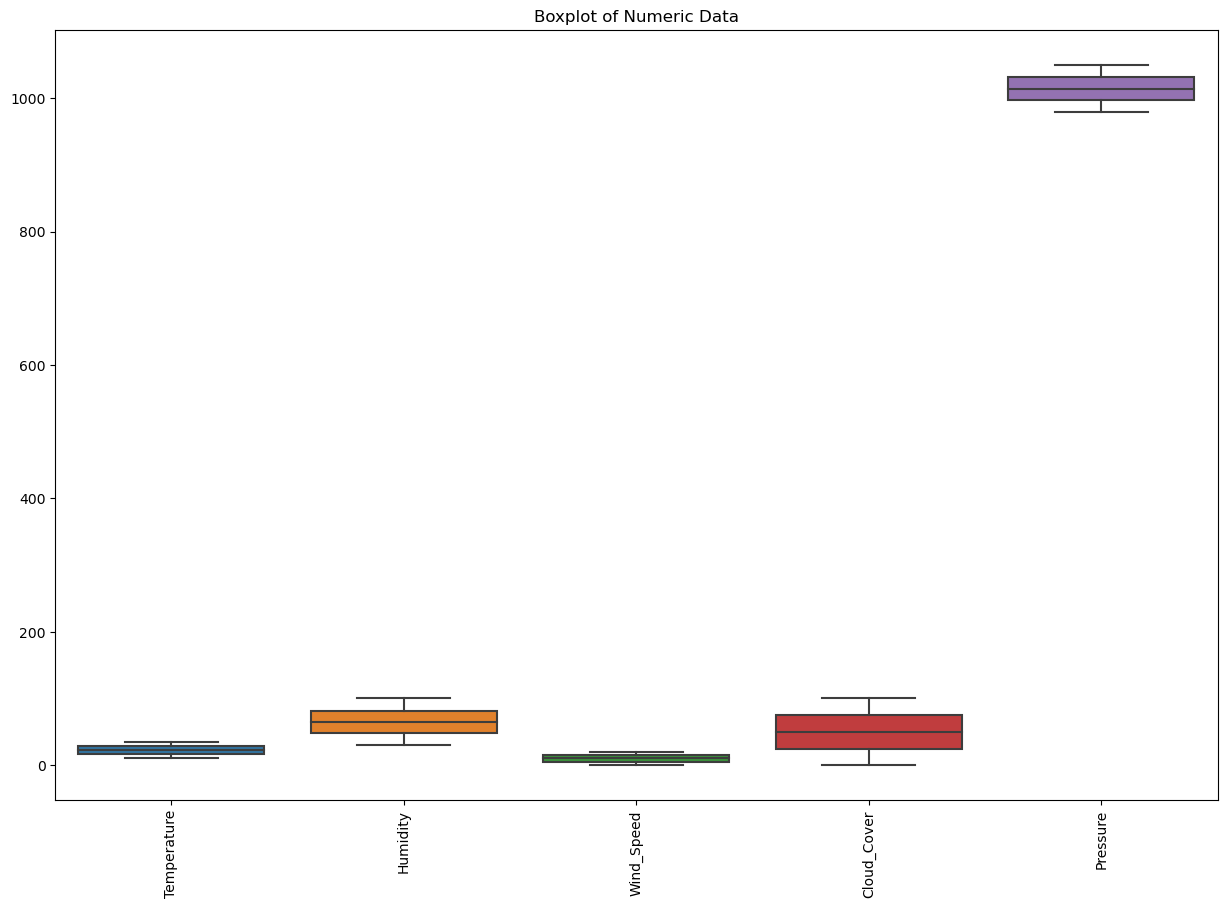

In [19]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
stat_an=numeric_data.describe()
print(stat_an)
print(df.head(20))
print(df.tail())
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_data)
plt.title('Boxplot of Numeric Data')
plt.xticks(rotation=90)  
plt.show()

### Correalation

             Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
Temperature     1.000000 -0.014119   -0.004957     0.006632 -0.007489
Humidity       -0.014119  1.000000    0.003816     0.007244 -0.032089
Wind_Speed     -0.004957  0.003816    1.000000    -0.000405  0.018772
Cloud_Cover     0.006632  0.007244   -0.000405     1.000000  0.023100
Pressure       -0.007489 -0.032089    0.018772     0.023100  1.000000


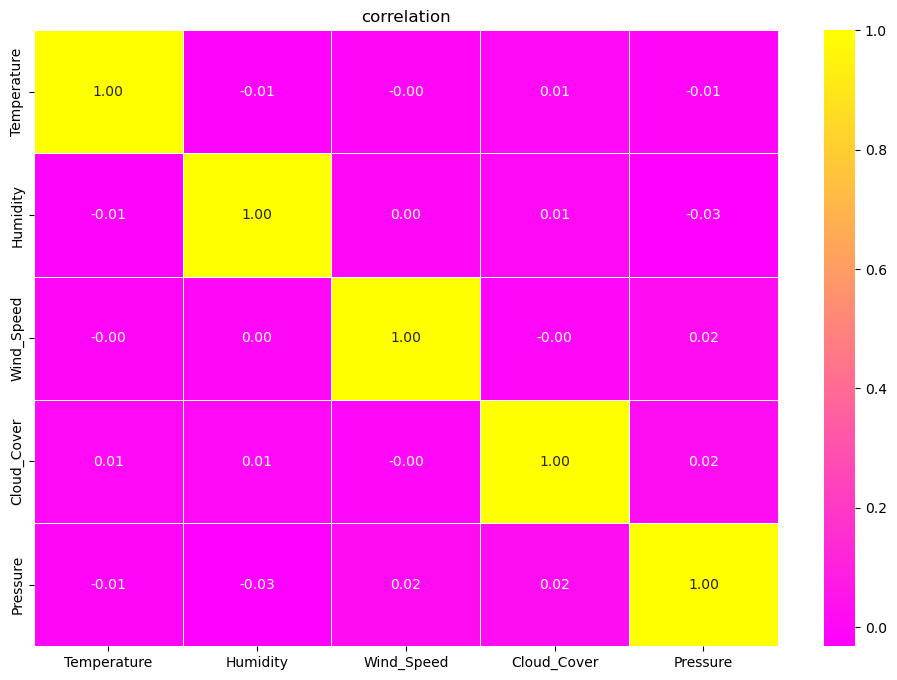

In [20]:
corelation=numeric_data.corr()
print(corelation)
plt.figure(figsize=(12,8))
sns.heatmap(corelation,cmap='spring',annot=True,fmt='.2f',linewidths=0.5)
plt.title("correlation")
plt.show()


### Training Model 

In [21]:
X = df.drop('Rain', axis=1)
y = df['Rain']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)


### Logistic Regression

[[429  14]
 [ 20  37]]
              precision    recall  f1-score   support

     no rain       0.96      0.97      0.96       443
        rain       0.73      0.65      0.69        57

    accuracy                           0.93       500
   macro avg       0.84      0.81      0.82       500
weighted avg       0.93      0.93      0.93       500



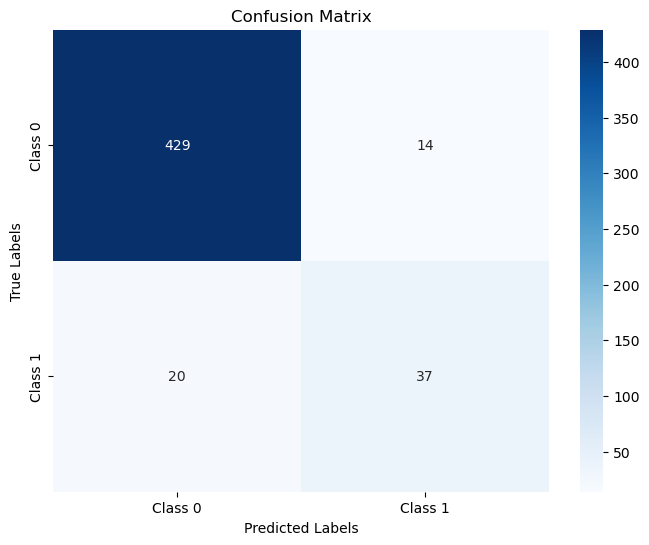

In [22]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)
lreg_pred = lreg.predict(X_test)
print(confusion_matrix(y_test, lreg_pred))
print(classification_report(y_test, lreg_pred))
conf_matrix = confusion_matrix(y_test, lreg_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Support Vector Machine

[[443   0]
 [ 57   0]]
              precision    recall  f1-score   support

     no rain       0.89      1.00      0.94       443
        rain       0.00      0.00      0.00        57

    accuracy                           0.89       500
   macro avg       0.44      0.50      0.47       500
weighted avg       0.78      0.89      0.83       500



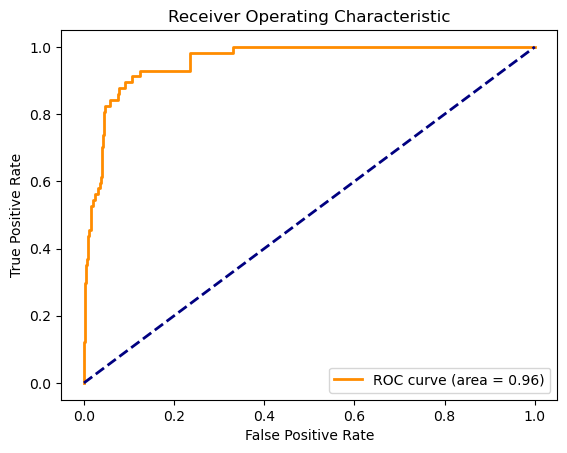

In [24]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred, zero_division=0))
svc_scores = svc.decision_function(X_test)
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, svc_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()




### Decision Tree

[[443   0]
 [  0  57]]
              precision    recall  f1-score   support

     no rain       1.00      1.00      1.00       443
        rain       1.00      1.00      1.00        57

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



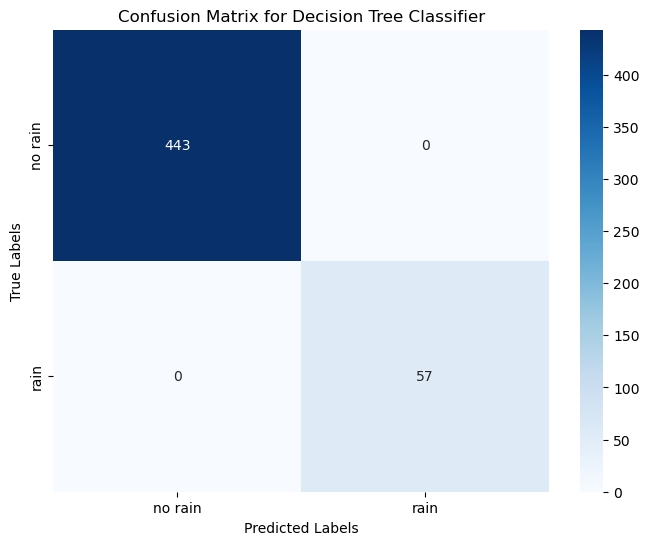

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))
# Generate the confusion matrix
cm = confusion_matrix(y_test, dt_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()





# Summary
### Three machine learning models—logistic regression, support vector machine (SVM), and decision tree—were trained and evaluated on a dataset using accuracy as the key performance metric. Logistic regression provided a baseline linear model, while SVM offered a robust margin-based classifier. The decision tree model, capable of capturing non-linear relationships, achieved the highest accuracy among the three. This suggests that the dataset's structure aligns more effectively with the tree-based model. While logistic regression and SVM have their advantages in interpretability and generalization, the decision tree demonstrated superior predictive power in this scenario, emphasizing the importance of model selection based on data characteristics.

# Conclusion
### The decision tree classifier achieved the highest accuracy, outperforming both logistic regression and SVM. This result indicates that decision trees are well-suited for the given dataset. Model selection should consider data complexity, and in this case, the decision tree's ability to model non-linear patterns led to the best performance.